Model Evaluation:
Accuracy: 0.97
Precision: 0.59
Recall: 0.09
F1 Score: 0.15

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     34679
           1       0.59      0.09      0.15      1138

    accuracy                           0.97     35817
   macro avg       0.78      0.54      0.57     35817
weighted avg       0.96      0.97      0.96     35817



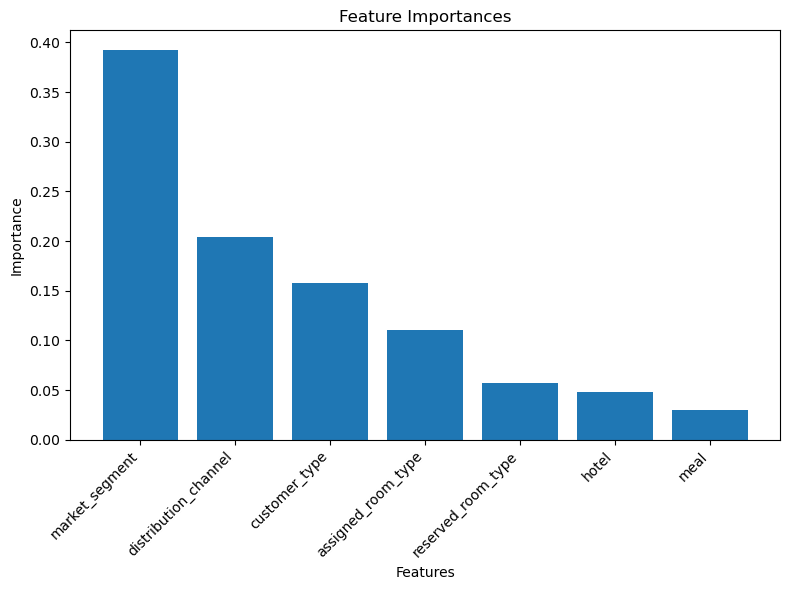

Market Segment Loyalty:
market_segment
Complementary    0.309556
Corporate        0.278376
Aviation         0.270042
Direct           0.063145
Offline TA/TO    0.015649
Groups           0.013629
Online TA        0.010571
Undefined        0.000000
Name: is_repeated_guest, dtype: float64

Distribution Channel Loyalty:
distribution_channel
Corporate    0.235435
Direct       0.063981
GDS          0.015544
TA/TO        0.013262
Undefined    0.000000
Name: is_repeated_guest, dtype: float64

Reserved Room Type Loyalty:
reserved_room_type
A    0.035735
G    0.031041
C    0.028970
E    0.028309
F    0.022782
H    0.019967
D    0.019218
B    0.011628
L    0.000000
P    0.000000
Name: is_repeated_guest, dtype: float64

Assigned Room Type Loyalty:
assigned_room_type
K    0.232975
I    0.162534
C    0.036632
D    0.035977
G    0.034469
E    0.034204
F    0.031991
A    0.028939
H    0.026685
B    0.023578
L    0.000000
P    0.000000
Name: is_repeated_guest, dtype: float64

Meal Type Loyalty:
meal
BB

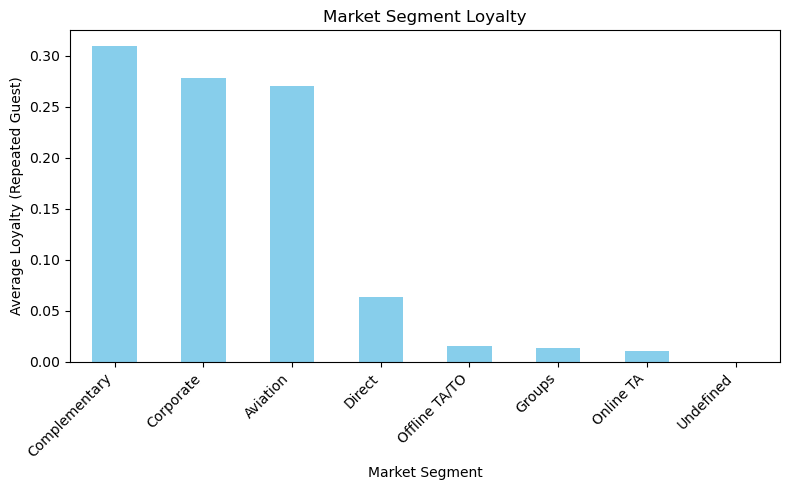

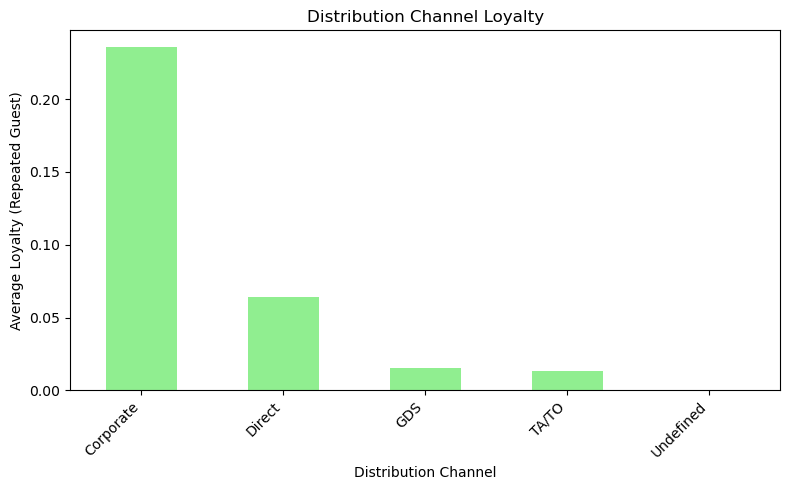

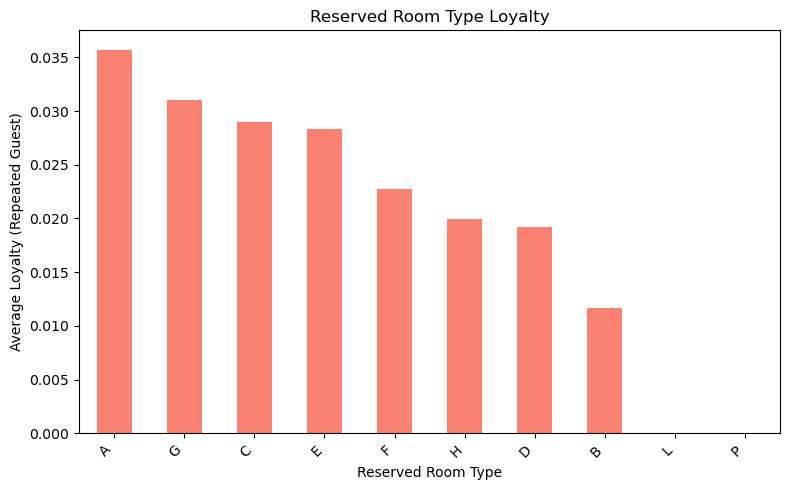

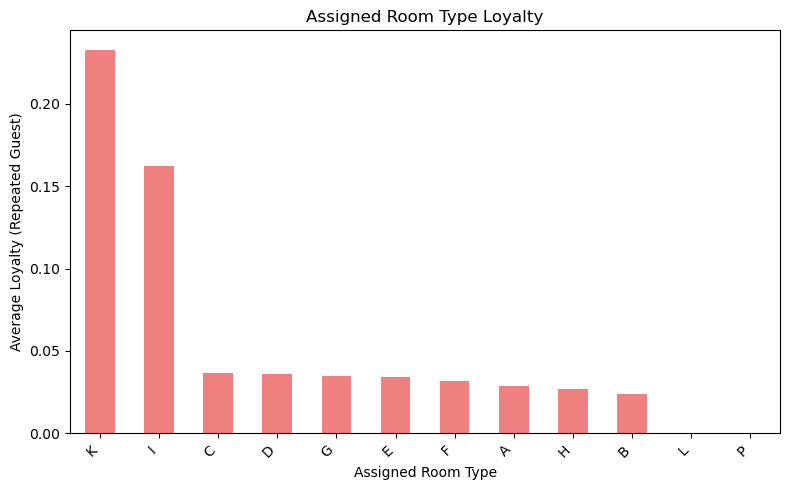

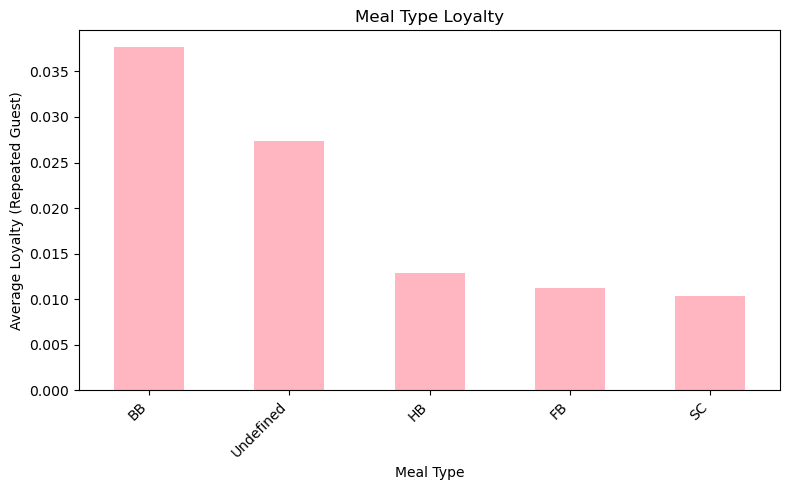

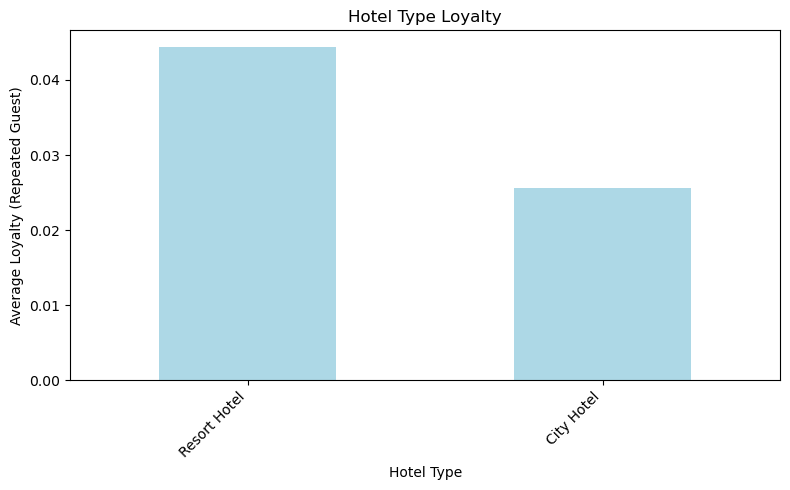

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load the dataset
file_path = '/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['children'] = data['children'].fillna(0)

# Encode categorical features
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'customer_type','reservation_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Select features and target variable
features = ['market_segment', 'distribution_channel', 'customer_type', 'reserved_room_type',
            'assigned_room_type', 'meal', 'hotel']
X = data[features]
y = data['is_repeated_guest']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Analyze top factors (e.g., Market Segment, Distribution Channel, and more)
# Decode categorical features for interpretability
for col in ['market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'meal', 'hotel']:
    data[col] = label_encoders[col].inverse_transform(data[col])

# Group data by market_segment and calculate average loyalty
market_segment_loyalty = data.groupby('market_segment')['is_repeated_guest'].mean().sort_values(ascending=False)
print("Market Segment Loyalty:")
print(market_segment_loyalty)

# Group data by distribution_channel and calculate average loyalty
distribution_channel_loyalty = data.groupby('distribution_channel')['is_repeated_guest'].mean().sort_values(ascending=False)
print("\nDistribution Channel Loyalty:")
print(distribution_channel_loyalty)

# Group data by reserved_room_type and calculate average loyalty
reserved_room_loyalty = data.groupby('reserved_room_type')['is_repeated_guest'].mean().sort_values(ascending=False)
print("\nReserved Room Type Loyalty:")
print(reserved_room_loyalty)

# Group data by assigned_room_type and calculate average loyalty
assigned_room_loyalty = data.groupby('assigned_room_type')['is_repeated_guest'].mean().sort_values(ascending=False)
print("\nAssigned Room Type Loyalty:")
print(assigned_room_loyalty)

# Group data by meal and calculate average loyalty
meal_loyalty = data.groupby('meal')['is_repeated_guest'].mean().sort_values(ascending=False)
print("\nMeal Type Loyalty:")
print(meal_loyalty)

# Group data by hotel and calculate average loyalty
hotel_loyalty = data.groupby('hotel')['is_repeated_guest'].mean().sort_values(ascending=False)
print("\nHotel Type Loyalty:")
print(hotel_loyalty)

# Plot Market Segment Loyalty
plt.figure(figsize=(8, 5))
market_segment_loyalty.plot(kind='bar', color='skyblue')
plt.title('Market Segment Loyalty')
plt.xlabel('Market Segment')
plt.ylabel('Average Loyalty (Repeated Guest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Distribution Channel Loyalty
plt.figure(figsize=(8, 5))
distribution_channel_loyalty.plot(kind='bar', color='lightgreen')
plt.title('Distribution Channel Loyalty')
plt.xlabel('Distribution Channel')
plt.ylabel('Average Loyalty (Repeated Guest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Reserved Room Type Loyalty
plt.figure(figsize=(8, 5))
reserved_room_loyalty.plot(kind='bar', color='salmon')
plt.title('Reserved Room Type Loyalty')
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Loyalty (Repeated Guest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Assigned Room Type Loyalty
plt.figure(figsize=(8, 5))
assigned_room_loyalty.plot(kind='bar', color='lightcoral')
plt.title('Assigned Room Type Loyalty')
plt.xlabel('Assigned Room Type')
plt.ylabel('Average Loyalty (Repeated Guest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Meal Type Loyalty
plt.figure(figsize=(8, 5))
meal_loyalty.plot(kind='bar', color='lightpink')
plt.title('Meal Type Loyalty')
plt.xlabel('Meal Type')
plt.ylabel('Average Loyalty (Repeated Guest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Hotel Type Loyalty
plt.figure(figsize=(8, 5))
hotel_loyalty.plot(kind='bar', color='lightblue')
plt.title('Hotel Type Loyalty')
plt.xlabel('Hotel Type')
plt.ylabel('Average Loyalty (Repeated Guest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Random Forest Model Evaluation:
Accuracy: 0.84
Precision: 0.14
Recall: 0.77
F1 Score: 0.24
ROC-AUC Score: 0.87

Confusion Matrix:
[[29390  5289]
 [  264   874]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     34679
           1       0.14      0.77      0.24      1138

    accuracy                           0.84     35817
   macro avg       0.57      0.81      0.58     35817
weighted avg       0.96      0.84      0.89     35817


Logistic Regression Model Evaluation:
Accuracy: 0.80
Precision: 0.11
Recall: 0.74
F1 Score: 0.19
ROC-AUC Score: 0.84

Confusion Matrix:
[[27828  6851]
 [  293   845]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     34679
           1       0.11      0.74      0.19      1138

    accuracy                           0.80     35817
   macro avg       0.55      0.77      0.54     35817
weighted avg       0.96

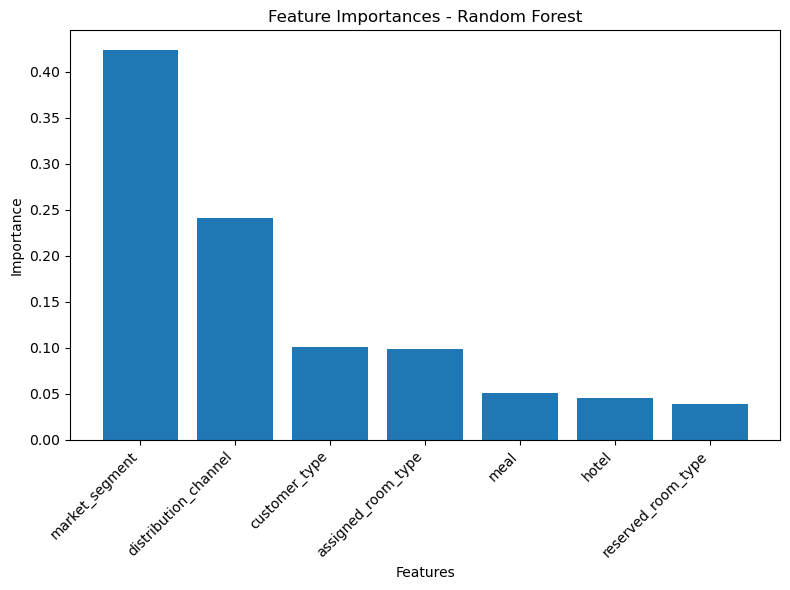

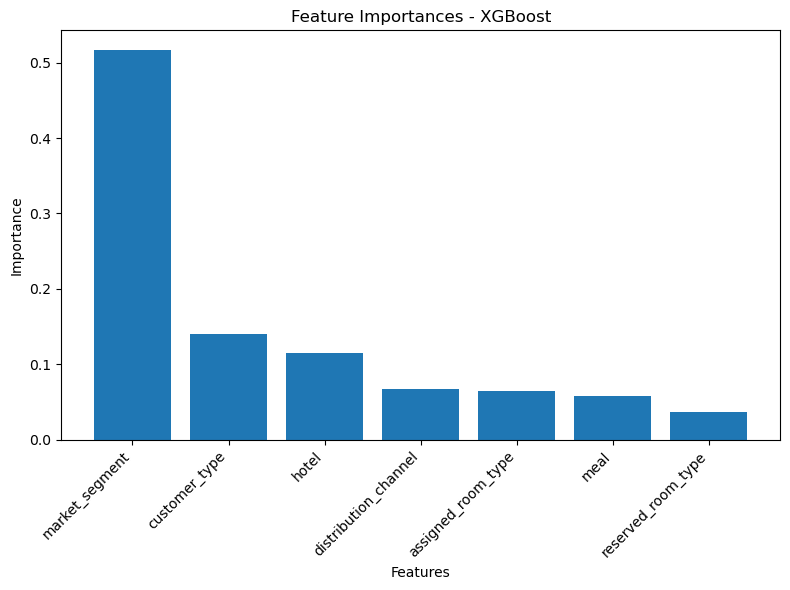

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE



# Load the dataset
file_path = '/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['children'] = data['children'].fillna(0)

# Encode categorical features
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'customer_type', 'reservation_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Select features and target variable
features = ['market_segment', 'distribution_channel', 'customer_type', 'reserved_room_type',
            'assigned_room_type', 'meal', 'hotel']
X = data[features]
y = data['is_repeated_guest']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_res, y_train_res)

# Train a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_res, y_train_res)

# Train a Gradient Boosting (XGBoost) model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Define a function to evaluate models
def evaluate_model(y_test, y_pred, y_pred_proba, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC Score: {roc_auc:.2f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Predictions and evaluations for Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest")

# Predictions and evaluations for Logistic Regression
y_pred_logreg = logreg_model.predict(X_test)
y_pred_proba_logreg = logreg_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_logreg, y_pred_proba_logreg, "Logistic Regression")

# Predictions and evaluations for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_xgb, y_pred_proba_xgb, "XGBoost (Gradient Boosting)")

# Feature importance visualization for Random Forest and XGBoost
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feature_names = X.columns
    sorted_indices = importances.argsort()[::-1]

    plt.figure(figsize=(8, 6))
    plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
    plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
    plt.title(f"Feature Importances - {model_name}")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

# Plot feature importance for Random Forest
plot_feature_importance(rf_model, "Random Forest")

# Plot feature importance for XGBoost
plot_feature_importance(xgb_model, "XGBoost")




Random Forest Model Evaluation:
Mean Absolute Error (MAE): 23.24
Mean Squared Error (MSE): 1103.43
Root Mean Squared Error (RMSE): 33.22
R2 Score: 0.52

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 34.39
Mean Squared Error (MSE): 2144.25
Root Mean Squared Error (RMSE): 46.31
R2 Score: 0.08

XGBoost Model Evaluation:
Mean Absolute Error (MAE): 23.25
Mean Squared Error (MSE): 1103.43
Root Mean Squared Error (RMSE): 33.22
R2 Score: 0.52


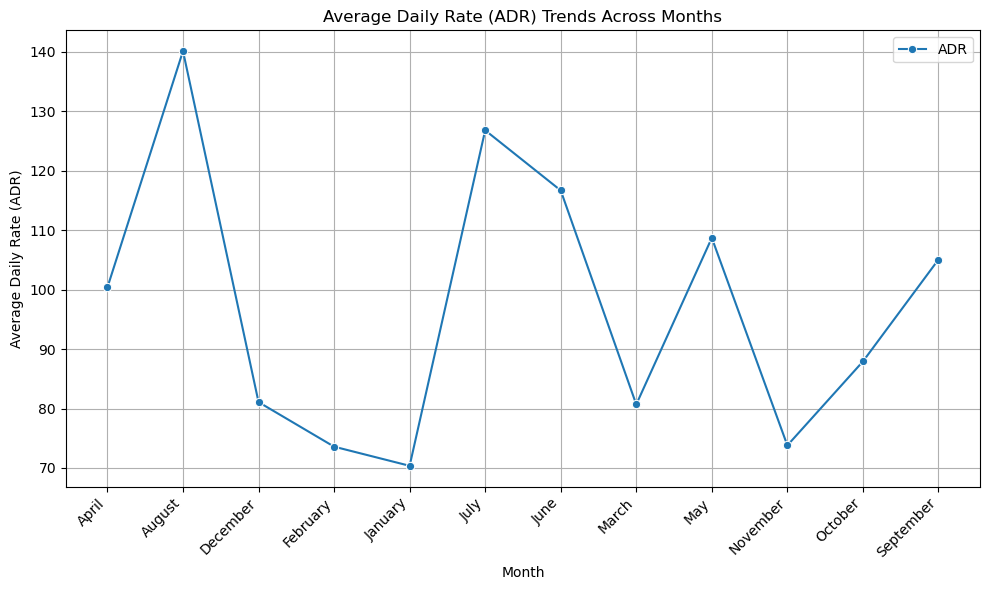

C:\Users\Acer\AppData\Local\Temp\ipykernel_14008\14291326.py:95: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='market_segment', y='adr', data=data, ci=None, palette='viridis')
C:\Users\Acer\AppData\Local\Temp\ipykernel_14008\14291326.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='adr', data=data, ci=None, palette='viridis')


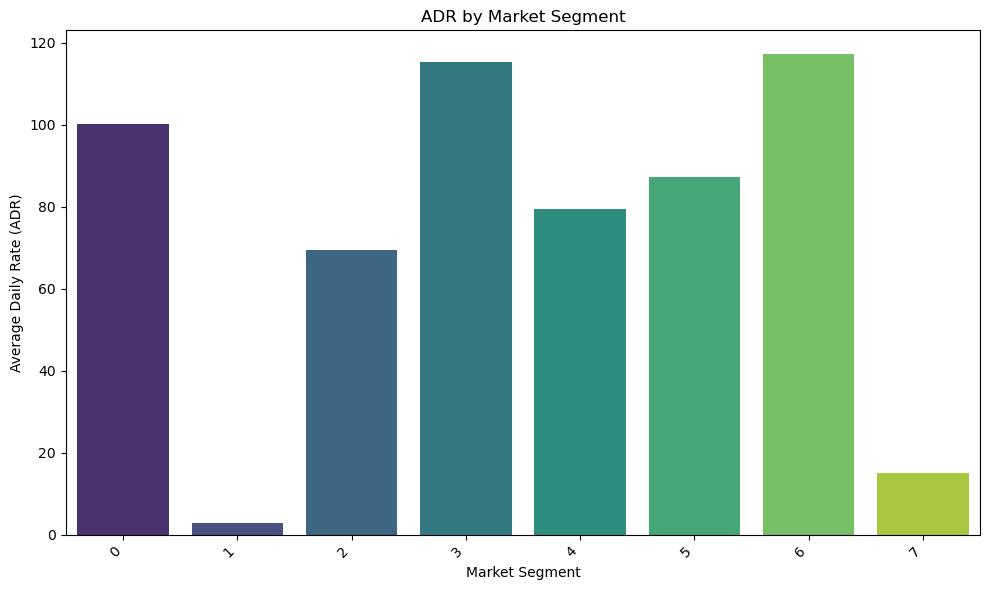

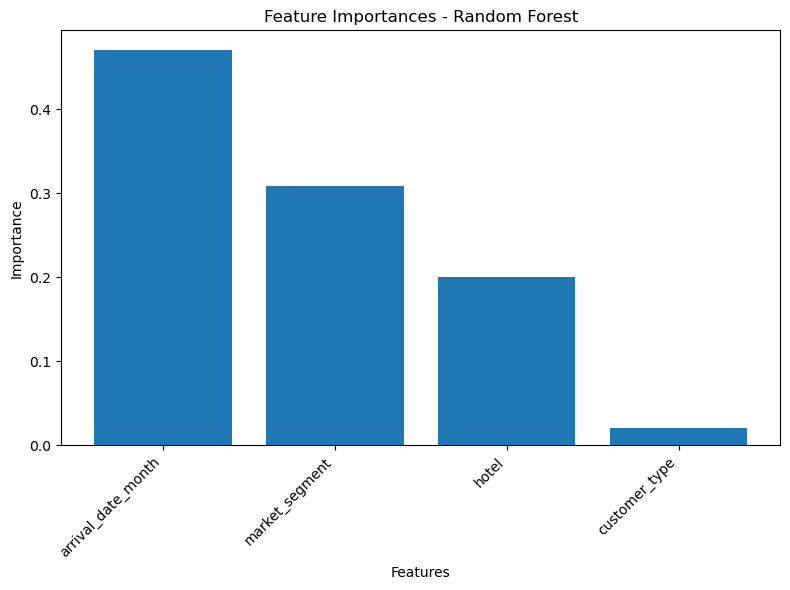

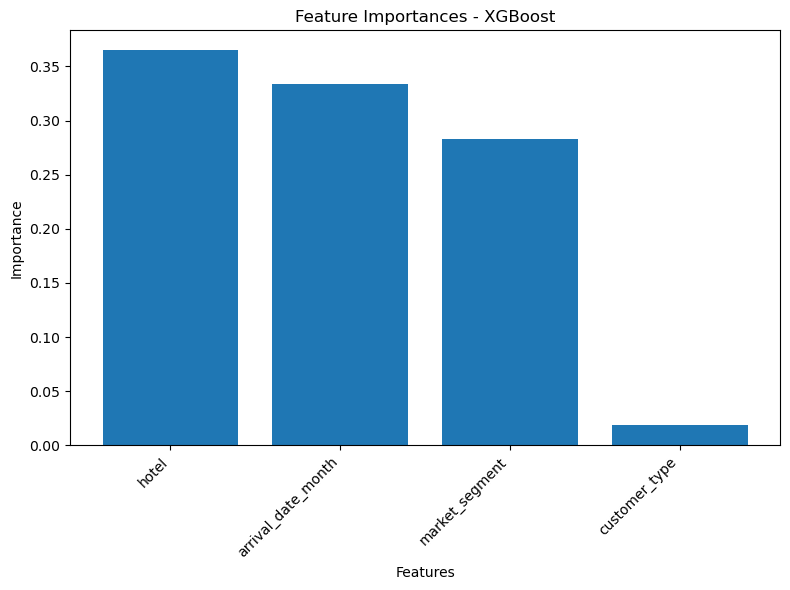

ValueError: could not convert string to float: 'July'

<Figure size 1000x800 with 0 Axes>

In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = '/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['children'] = data['children'].fillna(0)

# Encode categorical features
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'customer_type', 'reservation_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Feature selection for pricing trend analysis
# Assume 'adr' (Average Daily Rate) is the target variable for pricing
features = ['arrival_date_month', 'hotel', 'market_segment', 'customer_type']
X = data[features]
y = data['adr']  # Target variable is the average daily rate

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Train Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Function to evaluate regression models
def evaluate_regression_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Predictions and evaluations for Random Forest
y_pred_rf = rf_model.predict(X_test)
evaluate_regression_model(y_test, y_pred_rf, "Random Forest")

# Predictions and evaluations for Linear Regression
y_pred_linreg = linreg_model.predict(X_test)
evaluate_regression_model(y_test, y_pred_linreg, "Linear Regression")

# Predictions and evaluations for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
evaluate_regression_model(y_test, y_pred_xgb, "XGBoost")

# Data Visualizations

# Decode arrival_date_month for interpretability in plots
data['arrival_date_month'] = label_encoders['arrival_date_month'].inverse_transform(data['arrival_date_month'])

# ADR trends by month
adr_trends = data.groupby('arrival_date_month')['adr'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=adr_trends.index, y=adr_trends.values, marker='o', label='ADR')
plt.title('Average Daily Rate (ADR) Trends Across Months')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# ADR by market segment
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=data, ci=None, palette='viridis')
plt.title('ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature importance visualization for Random Forest and XGBoost
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    feature_names = X.columns
    sorted_indices = importances.argsort()[::-1]

    plt.figure(figsize=(8, 6))
    plt.bar(range(len(sorted_indices)), importances[sorted_indices], align='center')
    plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=45, ha='right')
    plt.title(f"Feature Importances - {model_name}")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.tight_layout()
    plt.show()

# Plot feature importance for Random Forest
plot_feature_importance(rf_model, "Random Forest")

# Plot feature importance for XGBoost
plot_feature_importance(xgb_model, "XGBoost")

# Correlation heatmap for features and ADR
plt.figure(figsize=(10, 8))
sns.heatmap(data[features + ['adr']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_17492\675597070.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['children'].fillna(0, inplace=True)



Model Comparison Summary:
               Model        MAE          MSE       RMSE  R² Score  \
0      Random Forest  23.243048  1103.425350  33.217847  0.524031   
1  Linear Regression  34.388764  2144.246494  46.306009  0.075066   
2          Gradiant   23.248880  1103.434370  33.217983  0.524027   

   Accuracy (%)  
0     77.208268  
1     66.278971  
2     77.202549  


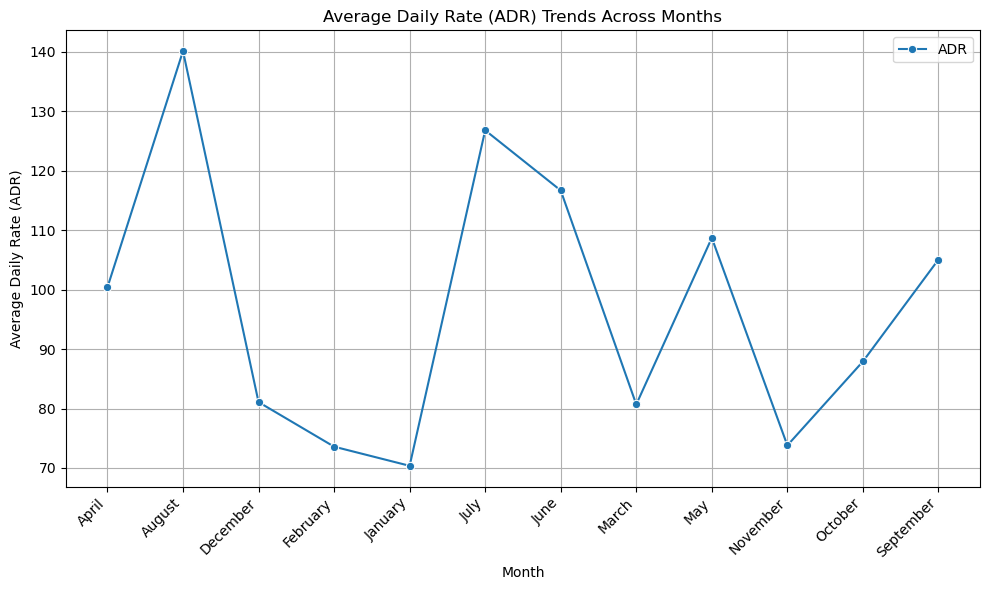

C:\Users\Acer\AppData\Local\Temp\ipykernel_17492\675597070.py:110: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='market_segment', y='adr', data=data, ci=None, palette='viridis', order=data['market_segment'].unique())
C:\Users\Acer\AppData\Local\Temp\ipykernel_17492\675597070.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='market_segment', y='adr', data=data, ci=None, palette='viridis', order=data['market_segment'].unique())


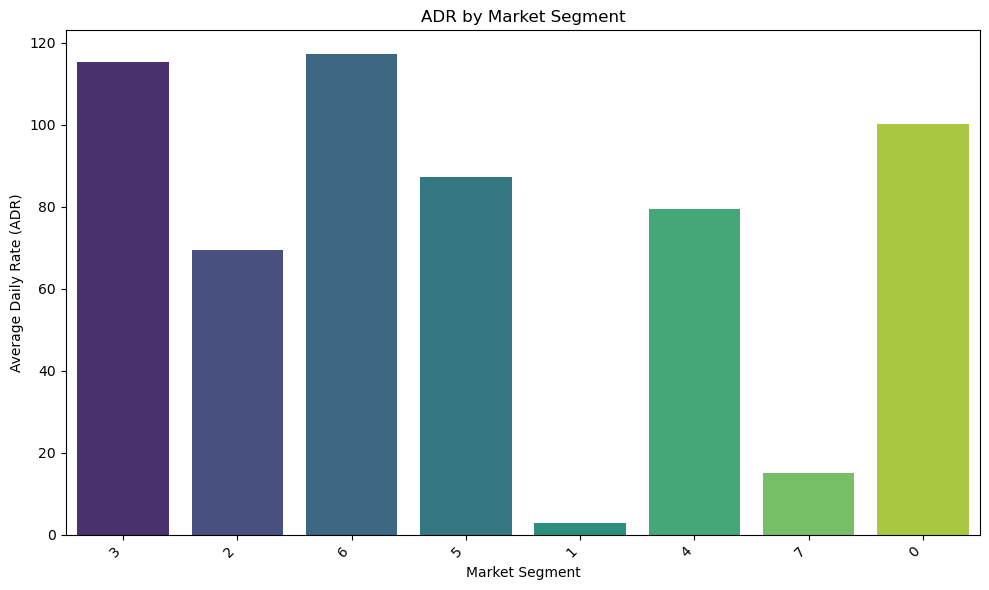

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the dataset
file_path = '/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv'
data = pd.read_csv(file_path)

# Fill missing values
data['children'].fillna(0, inplace=True)

# Encode categorical features
categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                       'customer_type', 'reservation_status']
label_encoders = {col: LabelEncoder() for col in categorical_columns}

for col in categorical_columns:
    data[col] = label_encoders[col].fit_transform(data[col])

# Define features and target for pricing trend analysis
features = ['arrival_date_month', 'hotel', 'market_segment', 'customer_type']
X = data[features]
y = data['adr']  # Target variable: Average Daily Rate (ADR)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Train Linear Regression model
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

# Train XGBoost Regressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Function to evaluate regression models
def evaluate_regression_model(y_test, y_pred, model_name):
    """
    Evaluate a regression model's performance using MAE, MSE, RMSE, and R2 Score.
    """
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Model Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Extend evaluation to generate a summary table of model performance
def evaluate_all_models(models, model_names, X_test, y_test):
    """
    Evaluate multiple regression models and summarize their performance in a table.
    """
    results = []
    for model, name in zip(models, model_names):
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        similarity = 100 * (1 - (mae / np.mean(y_test)))  # Interpret as accuracy-like metric
        results.append([name, mae, mse, rmse, r2, similarity])
    
    results_df = pd.DataFrame(results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R² Score', 'Accuracy (%)'])
    return results_df

# List of models to evaluate
models = [rf_model, linreg_model, xgb_model]
model_names = ["Random Forest", "Linear Regression", "Gradiant "]

# Evaluate and display results
results_df = evaluate_all_models(models, model_names, X_test, y_test)
print("\nModel Comparison Summary:")
print(results_df)

# Decode arrival_date_month for interpretability in plots
data['arrival_date_month'] = label_encoders['arrival_date_month'].inverse_transform(data['arrival_date_month'])

# ADR trends by month (dynamically sorted by month order)
adr_trends = data.groupby('arrival_date_month')['adr'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=adr_trends.index, y=adr_trends.values, marker='o', label='ADR')
plt.title('Average Daily Rate (ADR) Trends Across Months')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.tight_layout()
plt.show()

# ADR by market segment
plt.figure(figsize=(10, 6))
sns.barplot(x='market_segment', y='adr', data=data, ci=None, palette='viridis', order=data['market_segment'].unique())
plt.title('ADR by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()






In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
file_path = "/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv"  # Update this to the file path if necessary
data = pd.read_csv(file_path)

# Define target and features
target = "is_canceled"
features = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'meal', 'market_segment',
    'distribution_channel', 'is_repeated_guest', 'booking_changes',
    'total_of_special_requests', 'adr'
]

X = data[features]
y = data[target]

# Handle missing values (e.g., in 'children')
X.loc[:, 'children'] = X['children'].fillna(0)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps
categorical_features = ['meal', 'market_segment', 'distribution_channel']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Create pipeline with Bayesian Ridge Regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', BayesianRidge())
])

# Train the model
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)
y_pred_class = (y_pred >= 0.5).astype(int)  # Convert regression outputs to binary class predictions

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
report = classification_report(y_test, y_pred_class)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n")
print(report)


Accuracy: 73.24%
Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.88      0.80     22478
           1       0.70      0.49      0.58     13339

    accuracy                           0.73     35817
   macro avg       0.72      0.68      0.69     35817
weighted avg       0.73      0.73      0.72     35817




Random Forest Evaluation:
Accuracy: 71.67%
ROC-AUC Score: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.95      0.81     22478
           1       0.80      0.32      0.46     13339

    accuracy                           0.72     35817
   macro avg       0.75      0.64      0.63     35817
weighted avg       0.74      0.72      0.68     35817



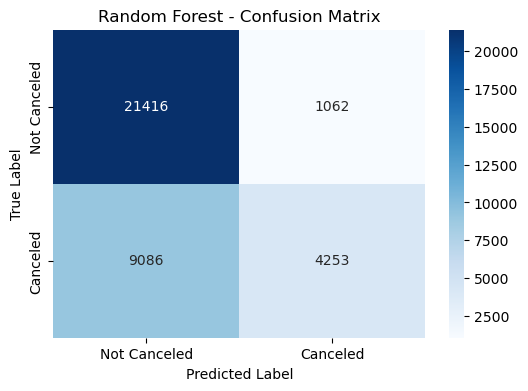


Logistic Regression Evaluation:
Accuracy: 70.66%
ROC-AUC Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80     22478
           1       0.73      0.33      0.46     13339

    accuracy                           0.71     35817
   macro avg       0.72      0.63      0.63     35817
weighted avg       0.71      0.71      0.67     35817



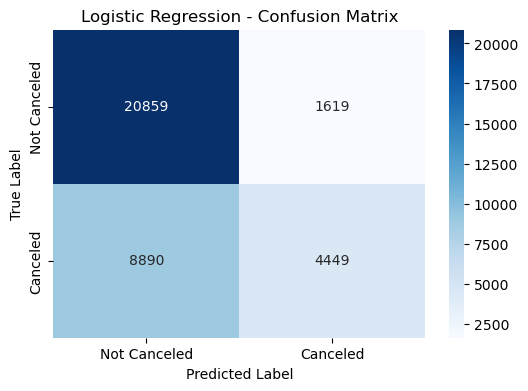

C:\Users\Acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:04:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Gradient Boosting (XGBoost) Evaluation:
Accuracy: 71.67%
ROC-AUC Score: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.95      0.81     22478
           1       0.80      0.32      0.46     13339

    accuracy                           0.72     35817
   macro avg       0.75      0.64      0.63     35817
weighted avg       0.74      0.72      0.68     35817



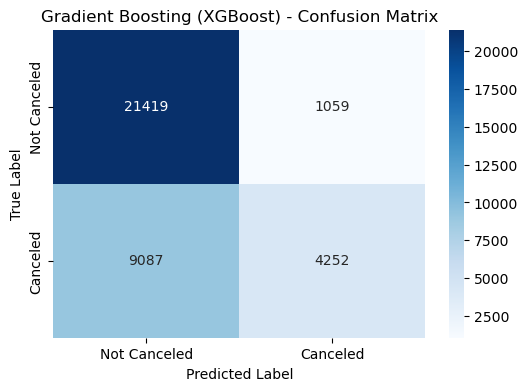

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns

# Load the dataset
file_path = "/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv"
data = pd.read_csv(file_path)

# Fill missing values
data['children'] = data['children'].fillna(0)

# Filter relevant columns for classification
data = data[['is_canceled', 'hotel', 'arrival_date_year', 'arrival_date_month', 
             'market_segment', 'customer_type']]

# Define target and features
target = 'is_canceled'
features = ['hotel', 'arrival_date_month', 'market_segment', 'customer_type']

X = data[features]
y = data[target]

# Preprocessing: One-hot encode categorical features
categorical_features = features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"

    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    if y_pred_proba is not None:
        print(f"ROC-AUC Score: {roc_auc:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'],
                yticklabels=['Not Canceled', 'Canceled'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
train_and_evaluate_model(rf_model, "Random Forest")

# Train and evaluate Logistic Regression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
train_and_evaluate_model(logreg_model, "Logistic Regression")

# Train and evaluate Gradient Boosting (XGBoost)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
train_and_evaluate_model(xgb_model, "Gradient Boosting (XGBoost)")


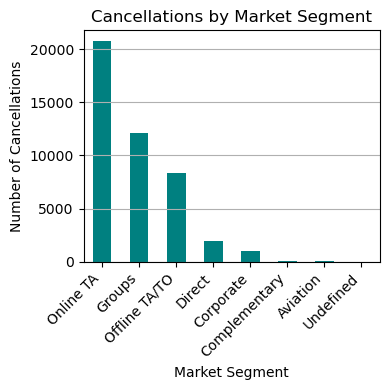

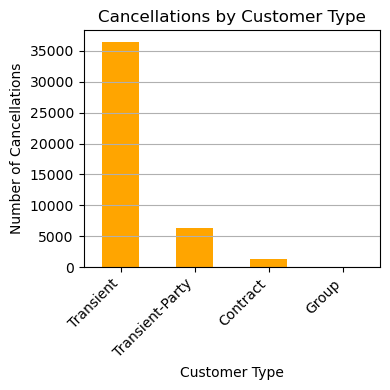

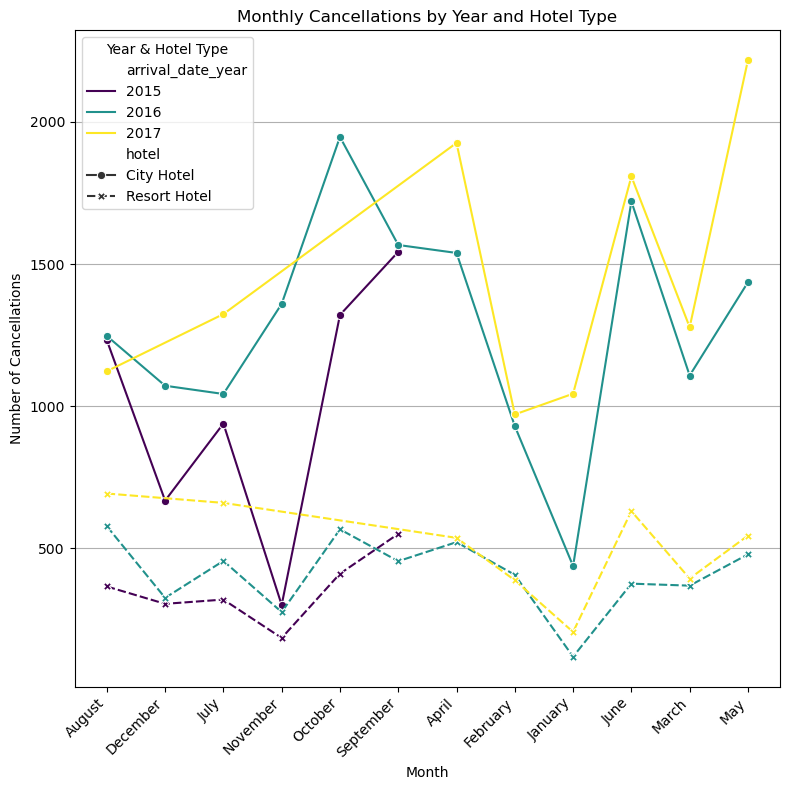

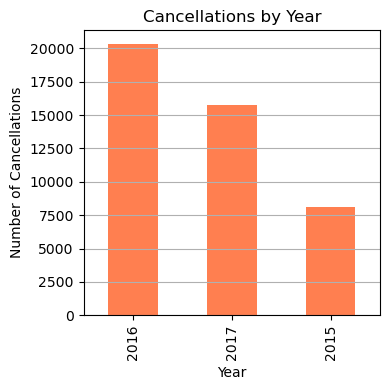

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/Acer/Downloads/testing of models/hotel_bookings_PREPROCESSED.csv"
data = pd.read_csv(file_path)

# Fill missing values
data['children'] = data['children'].fillna(0)

# Filter relevant columns
columns_needed = ['is_canceled', 'hotel', 'arrival_date_year', 'arrival_date_month', 
                  'market_segment', 'customer_type']
data = data[columns_needed]

# Grouping cancellations by market segment and customer type
market_segment_cancellations = data[data['is_canceled'] == 1].groupby('market_segment')['is_canceled'].count()
customer_type_cancellations = data[data['is_canceled'] == 1].groupby('customer_type')['is_canceled'].count()

# Grouping cancellations by month and hotel type (2015, 2016, 2017)
monthly_cancellations = data[data['is_canceled'] == 1].groupby(
    ['arrival_date_year', 'arrival_date_month', 'hotel']
)['is_canceled'].count()

# Year with the highest cancellations
yearly_cancellations = data[data['is_canceled'] == 1].groupby('arrival_date_year')['is_canceled'].count()

# --------------------- Visualization ---------------------

# Plot 1: Market Segment with the Highest Cancellations
plt.figure(figsize=(4, 4))
market_segment_cancellations.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Cancellations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 2: Customer Type with the Highest Cancellations
plt.figure(figsize=(4, 4))
customer_type_cancellations.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Cancellations by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot 3: Monthly Cancellations by Year and Hotel Type
plt.figure(figsize=(8, 8))
monthly_cancellations = monthly_cancellations.reset_index()
sns.lineplot(data=monthly_cancellations, x='arrival_date_month', y='is_canceled', 
             hue='arrival_date_year', style='hotel', markers=True, palette='viridis')
plt.title('Monthly Cancellations by Year and Hotel Type')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Year & Hotel Type')
plt.tight_layout()
plt.show()

# Plot 4: Year with the Highest Cancellations
plt.figure(figsize=(4, 4))
yearly_cancellations.sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title('Cancellations by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cancellations')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
